In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('letter-recognition.csv')
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
df.shape

(20000, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
letter    20000 non-null object
xbox      20000 non-null int64
ybox      20000 non-null int64
width     20000 non-null int64
height    20000 non-null int64
onpix     20000 non-null int64
xbar      20000 non-null int64
ybar      20000 non-null int64
x2bar     20000 non-null int64
y2bar     20000 non-null int64
xybar     20000 non-null int64
x2ybar    20000 non-null int64
xy2bar    20000 non-null int64
xedge     20000 non-null int64
xedgey    20000 non-null int64
yedge     20000 non-null int64
yedgex    20000 non-null int64
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


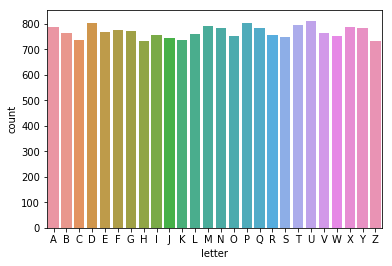

In [13]:

sns.countplot(df['letter'].sort_values(ascending=True))
plt.show()

In [6]:
df.columns

Index(['letter', 'xbox ', 'ybox ', 'width ', 'height', 'onpix ', 'xbar ',
       'ybar ', 'x2bar', 'y2bar ', 'xybar ', 'x2ybar', 'xy2bar', 'xedge ',
       'xedgey', 'yedge ', 'yedgex'],
      dtype='object')

In [7]:
df.rename({'xbox ':'xbox','ybox ':'xbox','width ':'width','onpix ':'onpix','xbar ':'xbar','ybar ':'ybar',
          'y2bar ':'y2bar','xybar ':'xybar','xedge ':'xedge','yedge ':'yedge'},axis = 1,inplace = True)

In [8]:
df.columns

Index(['letter', 'xbox', 'xbox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

In [14]:
letter_means = df.groupby('letter').mean()
letter_means.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
letter,,,,,,,,,,,,,,,,
A,3.337136,6.975919,5.128010,5.178707,2.991128,8.851711,3.631179,2.755387,2.043093,7.802281,2.338403,8.465146,2.771863,6.321926,2.875792,7.468948
B,3.985640,6.962141,5.088773,5.169713,4.596606,7.671018,7.062663,5.366841,5.571802,7.954308,5.506527,6.652742,3.117493,7.919060,6.612272,9.100522
C,4.031250,7.063859,4.701087,5.296196,2.775815,5.437500,7.627717,5.927989,7.177989,8.773098,7.494565,11.947011,1.991848,8.876359,4.080163,8.555707
D,4.023602,7.244720,5.170186,5.288199,4.026087,7.539130,6.806211,5.921739,6.508075,8.166460,5.111801,5.750311,3.365217,7.813665,3.971429,7.628571
E,3.727865,6.944010,4.756510,5.201823,3.679688,5.966146,7.352865,4.223958,7.585938,8.507812,6.242188,10.341146,2.127604,8.298177,6.022135,8.506510


In [21]:
X = df.drop('letter',axis = 1)
y = df['letter']
X.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 40)
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(16000, 16) (4000, 16) (16000,) (4000,)


In [24]:
from sklearn.svm import SVC

In [25]:
clf = SVC(kernel = 'linear')
model = clf.fit(X_train,y_train)

In [26]:
y_pred = model.predict(X_test)
#y_prob = model.predict_proba(X_test)

In [27]:
from sklearn import metrics
metrics.confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[141,   0,   1,   1,   0,   0,   0,   0,   0,   0,   2,   0,   0,
          0,   0,   0,   0,   0,   2,   1,   3,   0,   0,   0,   0,   0],
       [  1, 144,   0,   0,   1,   0,   1,   5,   0,   1,   1,   0,   0,
          0,   0,   0,   0,   5,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 115,   1,   5,   1,   2,   0,   0,   0,   3,   1,   1,
          0,   0,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0],
       [  1,  11,   0, 145,   0,   0,   0,   2,   1,   0,   0,   0,   0,
          2,   0,   1,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,   2,   3,   0, 145,   1,   2,   0,   1,   0,   1,   2,   0,
          0,   0,   0,   1,   1,   2,   2,   0,   0,   0,   1,   0,   1],
       [  0,   0,   1,   3,   1, 136,   0,   1,   1,   2,   0,   0,   0,
          1,   0,   5,   0,   0,   3,   2,   0,   0,   0,   0,   4,   0],
       [  0,   0,   7,   3,   1,   0, 134,   2,   0,   0,   1,   2,   1,
          0,   0,   0,   7,   3,   3,   0,   

In [28]:
print('accuracy',metrics.accuracy_score(y_test,y_pred))


accuracy 0.859


## K-Fold cross validation

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score

In [30]:
folds = KFold(n_splits = 5,shuffle = True,random_state = 4)

hyper_params = [ {'gamma': [1e-2,1e-3,1e-4],
                 'C': [1,10,100,1000]}]




## GridSearchCV

In [31]:
model = SVC()
model_cv = GridSearchCV(estimator=model, param_grid=hyper_params,
                       scoring='accuracy',
                       cv = folds,
                       verbose=1,
                       return_train_score=True)

In [32]:
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 14.9min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [33]:
y_pred_CV = model_cv.predict(X_test)


In [34]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.499397,0.047330,1.919101,0.006511,1,0.01,"{'C': 1, 'gamma': 0.01}",0.933750,0.927500,0.933750,...,0.930750,0.005911,5,0.945859,0.946562,0.945156,0.947109,0.948125,0.946562,0.001021
1,5.766099,0.073287,2.746026,0.020496,1,0.001,"{'C': 1, 'gamma': 0.001}",0.807187,0.801562,0.817187,...,0.808437,0.005027,10,0.812656,0.818516,0.812109,0.814063,0.818203,0.815109,0.002731
2,12.604976,0.062245,3.322898,0.039683,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.614375,0.612812,0.641875,...,0.622875,0.011969,12,0.623672,0.636953,0.630703,0.625000,0.634844,0.630234,0.005236
3,2.929122,0.046748,1.435183,0.024898,10,0.01,"{'C': 10, 'gamma': 0.01}",0.968125,0.966562,0.963437,...,0.965437,0.003323,3,0.989375,0.989219,0.990625,0.989922,0.990938,0.990016,0.000675
4,3.183773,0.069159,1.887918,0.026899,10,0.001,"{'C': 10, 'gamma': 0.001}",0.881250,0.875625,0.882188,...,0.879063,0.005840,7,0.892188,0.893828,0.893281,0.891250,0.897578,0.893625,0.002168
5,6.168270,0.501315,2.970892,0.349215,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.791875,0.786563,0.808125,...,0.795625,0.007189,11,0.801016,0.804531,0.798750,0.802109,0.803125,0.801906,0.001958
6,3.727578,0.594061,1.604174,0.186280,100,0.01,"{'C': 100, 'gamma': 0.01}",0.967812,0.972812,0.969688,...,0.969187,0.002641,1,0.999609,0.999531,0.999531,0.999531,0.999453,0.999531,0.000049
7,3.803901,0.406770,1.490640,0.119833,100,0.001,"{'C': 100, 'gamma': 0.001}",0.933438,0.925625,0.929375,...,0.928562,0.005811,6,0.954141,0.952812,0.952422,0.953125,0.954297,0.953359,0.000738
8,3.708323,0.162489,2.090709,0.091690,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.847812,0.844375,0.857812,...,0.848250,0.007546,9,0.859609,0.861094,0.857812,0.855547,0.862344,0.859281,0.002403
9,2.982489,0.017397,1.370819,0.019901,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.967500,0.970938,0.968437,...,0.968375,0.002222,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


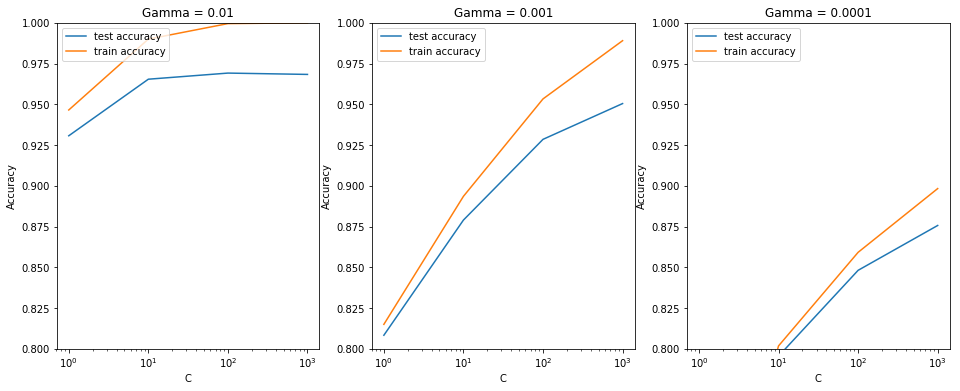

In [35]:
cv_results['param_C'] = cv_results['param_C'].astype('int')

plt.figure(figsize=(16,6))

#sbplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01['param_C'],gamma_01['mean_test_score'])
plt.plot(gamma_01['param_C'],gamma_01['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma = 0.01')
plt.ylim([0.80,1])
plt.legend(['test accuracy', 'train accuracy'], loc = 'upper left')
plt.xscale('log')

#subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001['param_C'],gamma_001['mean_test_score'])
plt.plot(gamma_001['param_C'],gamma_001['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma = 0.001')
plt.ylim([0.80,1])
plt.legend(['test accuracy', 'train accuracy'], loc = 'upper left')
plt.xscale('log')

plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001['param_C'],gamma_0001['mean_test_score'])
plt.plot(gamma_0001['param_C'],gamma_0001['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma = 0.0001')
plt.ylim([0.80,1])
plt.legend(['test accuracy', 'train accuracy'], loc = 'upper left')
plt.xscale('log')

In [36]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print('The best test score is {0} corresponding to hyper parameters {1}'.format(best_score,best_hyperparams))

The best test score is 0.9691875 corresponding to hyper parameters {'C': 100, 'gamma': 0.01}


## Building and Evaluating the final model

In [37]:
model_final  = SVC(C = 1000, gamma = 0.01,kernel = 'rbf')

model_final.fit(X_train,y_train)
y_pred = model_final.predict(X_test)

print('accuracy', metrics.accuracy_score(y_test,y_pred), '\n')
print(metrics.confusion_matrix(y_test,y_pred))

accuracy 0.97025 

[[150   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 153   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   1
    1   0   0   3   0   0   0   0]
 [  0   0 127   0   2   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   1   0   0   0   0   0]
 [  0   5   0 156   0   0   0   0   0   0   0   0   0   3   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0 161   1   1   0   0   0   0   0   0   0   0   0   0   0
    1   0   0   0   0   0   0   1]
 [  0   0   0   0   1 157   0   0   0   0   0   0   0   1   0   1   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   1   1   0   0 162   0   0   0   0   1   1   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   1   0   2   0   0   1 131   0   0   3   0   0   0   0   0   0   3
    0   0   1   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0 140   3   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
